<a href="https://colab.research.google.com/github/Mayakshanesht/Autonomous_Driving_Lecture_resources/blob/Perception/1_Transfer_Learning_And_CNN_Arch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#For Full dataset refer https://www.kaggle.com/moltean/fruits

In [2]:
import tensorflow as tf

In [3]:
from glob import glob

In [7]:
!pwd

/content


In [8]:
!ls -l

total 14344
-rw-r--r-- 1 root root 14680064 Feb  7 16:06 fruits-small.zip
drwxr-xr-x 1 root root     4096 Feb  7 16:06 sample_data


In [15]:
!unzip "/content/fruits-small.zip"

Archive:  /content/fruits-small.zip
   creating: fruits-small/
   creating: fruits-small/data/
   creating: fruits-small/data/Training/
   creating: fruits-small/data/Training/Banana/
  inflating: fruits-small/data/Training/Banana/0_100.jpg  
  inflating: fruits-small/data/Training/Banana/104_100.jpg  
  inflating: fruits-small/data/Training/Banana/107_100.jpg  
  inflating: fruits-small/data/Training/Banana/10_100.jpg  
  inflating: fruits-small/data/Training/Banana/112_100.jpg  
  inflating: fruits-small/data/Training/Banana/117_100.jpg  
  inflating: fruits-small/data/Training/Banana/118_100.jpg  
  inflating: fruits-small/data/Training/Banana/119_100.jpg  
  inflating: fruits-small/data/Training/Banana/11_100.jpg  
  inflating: fruits-small/data/Training/Banana/120_100.jpg  
  inflating: fruits-small/data/Training/Banana/121_100.jpg  
  inflating: fruits-small/data/Training/Banana/122_100.jpg  
  inflating: fruits-small/data/Training/Banana/123_100.jpg  
  inflating: fruits-small/d

In [16]:
#Set the path for train and validation folder
train_path = 'fruits-small/data/Training/'
valid_path = 'fruits-small/data/Validation/'

In [17]:
#Use glob to interact with the storage
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [18]:
#Useful for Getting number of labels
folders = glob(train_path+'/*')

In [19]:
# CNN ARCHITECTURES for Classification
# Guidelines by Prashant Nair
# Follow the following order when planning to use Transfer Learning with existing CNN architectures
# 1. VGG16
# 2. Inceptionv3
# 3. Resnet50
# 4. Xception
# 5. Nasnet --
# Only applicable if you are not planning to train entire model

In [20]:
#1. VGG16
# Refer https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16
# for more details

#Step1: Use Image Generator

gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True,
                                                      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

valid_generator = gen.flow_from_directory(valid_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)




Found 3425 images belonging to 7 classes.
Found 1150 images belonging to 7 classes.


In [21]:
#Use the existing CNN architecture's optimum weights and bias with your dataset and labels

#include_top=True ----> You are going to use the entire pretrained model with all classes.
#include_top=False ---> You are going to remove the FC layer and create your own FC layer.

vgg = tf.keras.applications.vgg16.VGG16(input_shape=[100,100,3],
                                        weights="imagenet",
                                        include_top=False)


#To use the existing weights and disable training on VGG object.
# Ensure all weights are immutable

for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [25]:
#Create our FC layer as per our spec
#Flatten
flatten = tf.keras.layers.Flatten()
#FC layer
finalLayer = tf.keras.layers.Dense(7,activation="softmax")


In [26]:
#Append VGG and FC and create a final model
model = tf.keras.models.Sequential([
                                    vgg,
                                    flatten,
                                    finalLayer
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 32263     
Total params: 14,746,951
Trainable params: 32,263
Non-trainable params: 14,714,688
_________________________________________________________________


In [27]:
#Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam', #tf.keras.optimizers.Adam(learning_rate=0.0001)
              metrics=['accuracy'])

In [28]:
#Fit/Training
batch_size=32
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=5,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    use_multiprocessing=False)

Epoch 1/5
107/107 [==============================] - 19s 114ms/step - loss: 4.1471 - accuracy: 0.8230 - val_loss: 0.0017 - val_accuracy: 0.9991
Epoch 2/5
107/107 [==============================] - 12s 110ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 2.8460e-04 - val_accuracy: 1.0000
Epoch 3/5
107/107 [==============================] - 12s 110ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 1.2076e-04 - val_accuracy: 1.0000
Epoch 4/5
107/107 [==============================] - 12s 110ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0032 - val_accuracy: 0.9982
Epoch 5/5
107/107 [==============================] - 12s 110ms/step - loss: 0.0107 - accuracy: 0.9989 - val_loss: 2.1287e-10 - val_accuracy: 1.0000


array([[2.7481147e-20, 0.0000000e+00, 0.0000000e+00, 2.2361175e-22,
        0.0000000e+00, 2.8825889e-38, 1.0000000e+00]], dtype=float32)

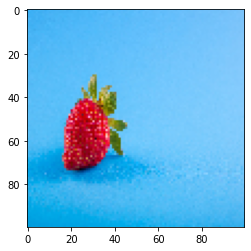

In [38]:
#Deployment --- Do it on your own
# 1. Download one friut image from Google Image
# 2. Load the image and make it compatible for VGG
# 3. Pass the image array to the trained model
img=tf.keras.preprocessing.image.load_img("/content/pexels-toni-cuenca-566888.jpg",target_size=([100,100,3]))
imgArray=tf.keras.preprocessing.image.img_to_array(img)
import numpy as np
img2=np.expand_dims(imgArray,axis=0)
import matplotlib.pyplot as plt
plt.imshow(img)
model.predict(img2)


In [ ]:
#InceptionV3


In [39]:
#Step1: Use Image Generator

gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True,
                                                      preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

valid_generator = gen.flow_from_directory(valid_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

Found 3425 images belonging to 7 classes.
Found 1150 images belonging to 7 classes.


In [40]:
inception = tf.keras.applications.inception_v3.InceptionV3(input_shape=[100,100,3],
                                        weights="imagenet",
                                        include_top=False)


87916544/87910968 [==============================] - 1s 0us/step


In [41]:

for layer in inception.layers:
  layer.trainable = False

#Create our FC layer as per our spec
#Flatten
flatten = tf.keras.layers.Flatten()
#FC layer
finalLayer = tf.keras.layers.Dense(7,activation="softmax")

#Append Inception and FC and create a final model
model = tf.keras.models.Sequential([
                                    inception,
                                    flatten,
                                    finalLayer
])

In [42]:
#Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#Fit/Training
batch_size=32
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=5,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    use_multiprocessing=False)

Epoch 1/5
107/107 [==============================] - 17s 123ms/step - loss: 0.6902 - accuracy: 0.7774 - val_loss: 0.0913 - val_accuracy: 0.9750
Epoch 2/5
107/107 [==============================] - 12s 112ms/step - loss: 0.0480 - accuracy: 0.9878 - val_loss: 0.0750 - val_accuracy: 0.9777
Epoch 3/5
107/107 [==============================] - 12s 112ms/step - loss: 0.0248 - accuracy: 0.9966 - val_loss: 0.0404 - val_accuracy: 0.9866
Epoch 4/5
107/107 [==============================] - 12s 112ms/step - loss: 0.0148 - accuracy: 0.9976 - val_loss: 0.0510 - val_accuracy: 0.9839
Epoch 5/5
107/107 [==============================] - 12s 112ms/step - loss: 0.0172 - accuracy: 0.9976 - val_loss: 0.0490 - val_accuracy: 0.9786


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.8201272e-32,
        4.2729539e-29, 7.1600252e-30, 2.0465673e-37]], dtype=float32)

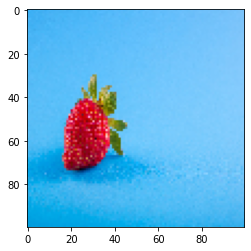

In [45]:
img=tf.keras.preprocessing.image.load_img("/content/pexels-toni-cuenca-566888.jpg",target_size=([100,100,3]))
imgArray=tf.keras.preprocessing.image.img_to_array(img)
import numpy as np
img2=np.expand_dims(imgArray,axis=0)
import matplotlib.pyplot as plt
plt.imshow(img)
model.predict(img2)

In [44]:
train_generator.class_indices

{'Banana': 0,
 'Lemon': 1,
 'Mango': 2,
 'Orange': 3,
 'Pineapple': 4,
 'Pomegranate': 5,
 'Strawberry': 6}

In [46]:
#Resnet50
#Step1: Use Image Generator

gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True,
                                                      preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

valid_generator = gen.flow_from_directory(valid_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

Found 3425 images belonging to 7 classes.
Found 1150 images belonging to 7 classes.


In [47]:
resnet = tf.keras.applications.resnet50.ResNet50(input_shape=[100,100,3],
                                        weights="imagenet",
                                        include_top=False)

for layer in resnet.layers:
  layer.trainable = False

#Create our FC layer as per our spec
#Flatten
flatten = tf.keras.layers.Flatten()
#FC layer
finalLayer = tf.keras.layers.Dense(7,activation="softmax")

#Append Inception and FC and create a final model
model = tf.keras.models.Sequential([
                                    resnet,
                                    flatten,
                                    finalLayer
])
#Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#Fit/Training
batch_size=32
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=5,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    use_multiprocessing=False)

94773248/94765736 [==============================] - 0s 0us/step
Epoch 1/5
107/107 [==============================] - 16s 123ms/step - loss: 0.3541 - accuracy: 0.9291 - val_loss: 3.0804e-04 - val_accuracy: 1.0000
Epoch 2/5
107/107 [==============================] - 12s 112ms/step - loss: 2.9996e-05 - accuracy: 1.0000 - val_loss: 3.8787e-04 - val_accuracy: 1.0000
Epoch 3/5
107/107 [==============================] - 12s 112ms/step - loss: 1.6970e-06 - accuracy: 1.0000 - val_loss: 3.4100e-07 - val_accuracy: 1.0000
Epoch 4/5
107/107 [==============================] - 12s 112ms/step - loss: 9.9190e-07 - accuracy: 1.0000 - val_loss: 6.6308e-06 - val_accuracy: 1.0000
Epoch 5/5
107/107 [==============================] - 12s 113ms/step - loss: 3.9333e-07 - accuracy: 1.0000 - val_loss: 4.4708e-05 - val_accuracy: 1.0000


array([[9.1973895e-01, 4.7712567e-29, 3.4486261e-35, 0.0000000e+00,
        5.5918003e-21, 2.5643971e-26, 8.0261052e-02]], dtype=float32)

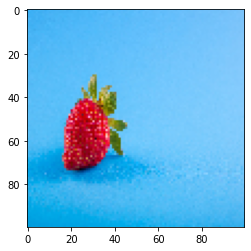

In [48]:
img=tf.keras.preprocessing.image.load_img("/content/pexels-toni-cuenca-566888.jpg",target_size=([100,100,3]))
imgArray=tf.keras.preprocessing.image.img_to_array(img)
import numpy as np
img2=np.expand_dims(imgArray,axis=0)
import matplotlib.pyplot as plt
plt.imshow(img)
model.predict(img2)

In [49]:
#Xception
#Step1: Use Image Generator

gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True,
                                                      preprocessing_function=tf.keras.applications.xception.preprocess_input)

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

valid_generator = gen.flow_from_directory(valid_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

Found 3425 images belonging to 7 classes.
Found 1150 images belonging to 7 classes.


In [50]:
xception = tf.keras.applications.xception.Xception(input_shape=[100,100,3],
                                        weights="imagenet",
                                        include_top=False)

for layer in resnet.layers:
  layer.trainable = False

#Create our FC layer as per our spec
#Flatten
flatten = tf.keras.layers.Flatten()
#FC layer
finalLayer = tf.keras.layers.Dense(7,activation="softmax")

#Append Inception and FC and create a final model
model = tf.keras.models.Sequential([
                                    xception,
                                    flatten,
                                    finalLayer
])
#Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#Fit/Training
batch_size=32
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=5,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    use_multiprocessing=False)

83689472/83683744 [==============================] - 2s 0us/step
Epoch 1/5
107/107 [==============================] - 19s 145ms/step - loss: 0.5851 - accuracy: 0.8139 - val_loss: 0.5063 - val_accuracy: 0.9616
Epoch 2/5
107/107 [==============================] - 15s 137ms/step - loss: 0.0896 - accuracy: 0.9847 - val_loss: 0.0727 - val_accuracy: 0.9920
Epoch 3/5
107/107 [==============================] - 15s 137ms/step - loss: 0.0277 - accuracy: 0.9946 - val_loss: 20.9142 - val_accuracy: 0.7196
Epoch 4/5
107/107 [==============================] - 15s 137ms/step - loss: 0.3783 - accuracy: 0.9668 - val_loss: 1.9542 - val_accuracy: 0.8571
Epoch 5/5
107/107 [==============================] - 15s 138ms/step - loss: 0.1125 - accuracy: 0.9813 - val_loss: 0.3999 - val_accuracy: 0.9723


array([[1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

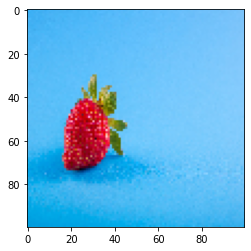

In [51]:
img=tf.keras.preprocessing.image.load_img("/content/pexels-toni-cuenca-566888.jpg",target_size=([100,100,3]))
imgArray=tf.keras.preprocessing.image.img_to_array(img)
import numpy as np
img2=np.expand_dims(imgArray,axis=0)
import matplotlib.pyplot as plt
plt.imshow(img)
model.predict(img2)

In [52]:
train_generator.class_indices

{'Banana': 0,
 'Lemon': 1,
 'Mango': 2,
 'Orange': 3,
 'Pineapple': 4,
 'Pomegranate': 5,
 'Strawberry': 6}

In [53]:
#Xception
#Step1: Use Image Generator

gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True,
                                                      preprocessing_function=tf.keras.applications.nasnet.preprocess_input)

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

valid_generator = gen.flow_from_directory(valid_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

Found 3425 images belonging to 7 classes.
Found 1150 images belonging to 7 classes.


In [54]:
nasnet = tf.keras.applications.xception.Xception(input_shape=[100,100,3],
                                        weights="imagenet",
                                        include_top=False)

for layer in nasnet.layers:
  layer.trainable = False

#Create our FC layer as per our spec
#Flatten
flatten = tf.keras.layers.Flatten()
#FC layer
finalLayer = tf.keras.layers.Dense(7,activation="softmax")

#Append Inception and FC and create a final model
model = tf.keras.models.Sequential([
                                    nasnet,
                                    flatten,
                                    finalLayer
])
#Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#Fit/Training
batch_size=32
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=5,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    use_multiprocessing=False)

Epoch 1/5
107/107 [==============================] - 15s 118ms/step - loss: 0.3094 - accuracy: 0.9082 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 2/5
107/107 [==============================] - 12s 111ms/step - loss: 0.0104 - accuracy: 0.9975 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3/5
107/107 [==============================] - 12s 111ms/step - loss: 0.0122 - accuracy: 0.9956 - val_loss: 0.0119 - val_accuracy: 0.9955
Epoch 4/5
107/107 [==============================] - 12s 113ms/step - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.0034 - val_accuracy: 0.9991
Epoch 5/5
107/107 [==============================] - 12s 113ms/step - loss: 0.0176 - accuracy: 0.9971 - val_loss: 0.0051 - val_accuracy: 0.9991


array([[1.3913927e-11, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

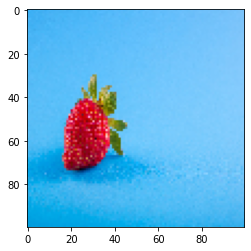

In [55]:
img=tf.keras.preprocessing.image.load_img("/content/pexels-toni-cuenca-566888.jpg",target_size=([100,100,3]))
imgArray=tf.keras.preprocessing.image.img_to_array(img)
import numpy as np
img2=np.expand_dims(imgArray,axis=0)
import matplotlib.pyplot as plt
plt.imshow(img)
model.predict(img2)

In [56]:
train_generator.class_indices

{'Banana': 0,
 'Lemon': 1,
 'Mango': 2,
 'Orange': 3,
 'Pineapple': 4,
 'Pomegranate': 5,
 'Strawberry': 6}